In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
area = meshmask.e1t[0] * meshmask.e2t[0]

# ensure tmask has same dimensions as field
tmask = tmask.rename({'z' : 'deptht'})

In [3]:
# make land versions of cmaps, land is grey
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_delta = copy.copy(cm.delta)
cm_delta.set_bad('grey')

In [4]:
data5 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/bad_restart/01jan18/SalishSea_1h_20180101_20180105_grid_T.nc')
combined_data_vosaline = xr.open_mfdataset('/results2/SalishSea/nowcast-green.202111/0[12345]jan18/SalishSea_1h_2018010[12345]_2018010[12345]_grid_T.nc', 
                                  data_vars = ['vosaline'])
combined_data_votemper = xr.open_mfdataset('/results2/SalishSea/nowcast-green.202111/0[12345]jan18/SalishSea_1h_2018010[12345]_2018010[12345]_grid_T.nc', 
                                  data_vars = ['vosaline'])
data5

<xarray.Dataset>
Dimensions:               (y: 898, x: 398, nvertex: 4, deptht: 40,
                           axis_nbounds: 2, time_counter: 120)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2018-01-01T00:30:00 ....
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon        (y, x, nvertex) float32 ...
    bounds_nav_lat        (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    sossheig              (time_counter, y, x) float32 ...
    votemper              (time_counter, deptht, y, x) float32 ...
    vosaline              (time_counter, deptht, y, x) float32 ...
    sigma_theta           (time_counter, deptht, y, x) float32 ...
    e3t                   (time_counter, deptht, y, x) float32 ...
    outfall               (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         SalishSea_1h_20180101_20180105_grid_T
    description:  physics tracers and VVL layer thicknesses
    title:        physics tracers and VVL layer thicknesses
    Conventions:  CF-1.6
    timeStamp:    2023-Oct-02 22:07:42 GMT
    uuid:         41a6c27b-d53c-4a43-a7f6-47999862ac42

In [5]:
def planview(base, new, field, it, ide, cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz].where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin)
    axs[0].set_title(f'Base {field}')

    new[field][it, ide, 400+iz:500-iz, 250+iz:350-iz].where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]-
     base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]).where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]
     ).plot(ax=axs[2], cmap=cm_bwr, 
                                                              vmax=dvmax, vmin=-dvmax)
    axs[2].set_title(f'Difference (New-Base) {field}')

    for ax in axs:
        viz_tools.set_aspect(ax)

    fig.suptitle(f'Depth {base.deptht[ide].values:.0f} m')

    axs[0].scatter(304 - 280, 446 - 430, marker = '*', color = 'm')
    axs[0].scatter(304 - 280, 447 - 430, marker = '*', color = 'm')
    axs[0].scatter(305 - 280, 446 - 430, marker = '*', color = 'm')
    axs[0].scatter(305 - 280, 447 - 430, marker = '*', color = 'm')

    axs[1].scatter(304 - 280, 446 - 430, marker = '*', color = 'm')
    axs[1].scatter(304 - 280, 447 - 430, marker = '*', color = 'm')
    axs[1].scatter(305 - 280, 446 - 430, marker = '*', color = 'm')
    axs[1].scatter(305 - 280, 447 - 430, marker = '*', color = 'm')

    axs[2].scatter(304 - 280, 446 - 430, marker = '*', color = 'g')
    axs[2].scatter(304 - 280, 447 - 430, marker = '*', color = 'g')
    axs[2].scatter(305 - 280, 446 - 430, marker = '*', color = 'g')
    axs[2].scatter(305 - 280, 447 - 430, marker = '*', color = 'g')

   



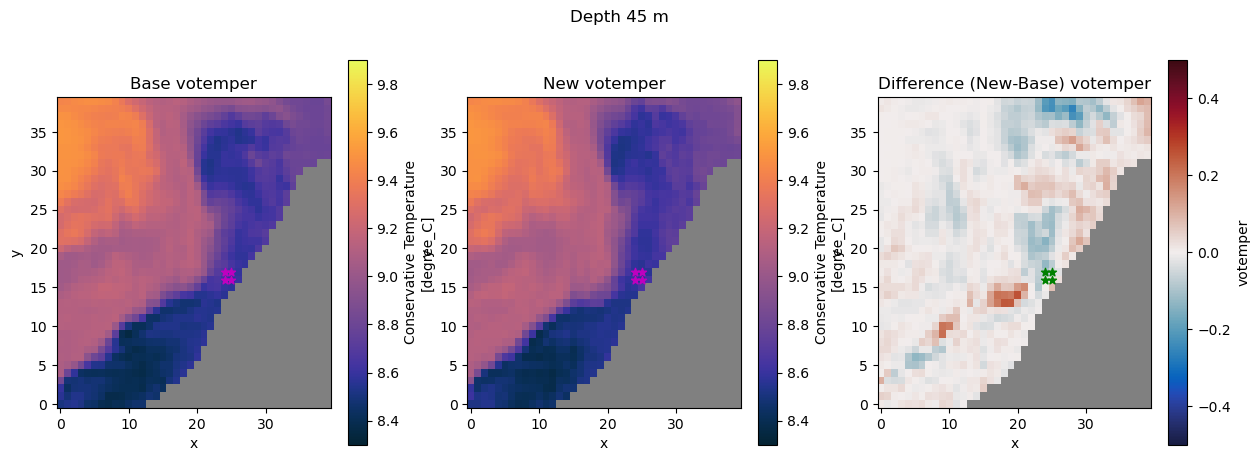

In [6]:
planview(combined_data_votemper, data5, 'votemper', 119, 23 , cm_temp, 9.9, 8.3, 0.5)

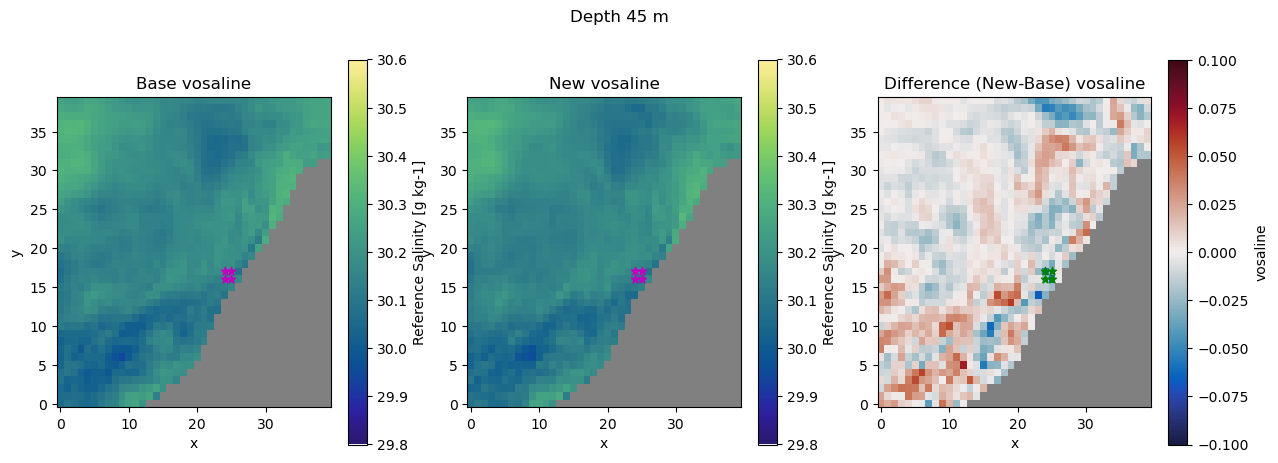

In [7]:
planview(combined_data_vosaline, data5, 'vosaline', 119, 23 , cm_salt, 30.6, 29.8, 0.1)

In [9]:

# vertical view for y = 446 or y = 447
def verticalview(base, new, field, it, dep, cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, :, dep, 250+iz:350-iz].where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[0].set_title(f'Base {field}')

    new[field][it, :, dep, 250+iz:350-iz].where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, :, dep, 250+iz:350-iz]-
     base[field][it, :, dep, 250+iz:350-iz]).where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[2], cmap=cm_bwr, 
                                        vmax=dvmax, vmin=-dvmax, yincrease = False)
    axs[2].set_title(f'Difference (New-Base) {field}')

    fig.suptitle(f'Vertical view at y = {dep}')

    axs[0].scatter(304 - 280, 98, marker = '*', color = 'm')
    axs[0].scatter(305 - 280, 76, marker = '*', color = 'm')

    axs[1].scatter(304 - 280, 98, marker = '*', color = 'm')
    axs[1].scatter(305 - 280, 76, marker = '*', color = 'm')

    axs[2].scatter(304 - 280, 98, marker = '*', color = 'm')
    axs[2].scatter(305 - 280, 76, marker = '*', color = 'm')

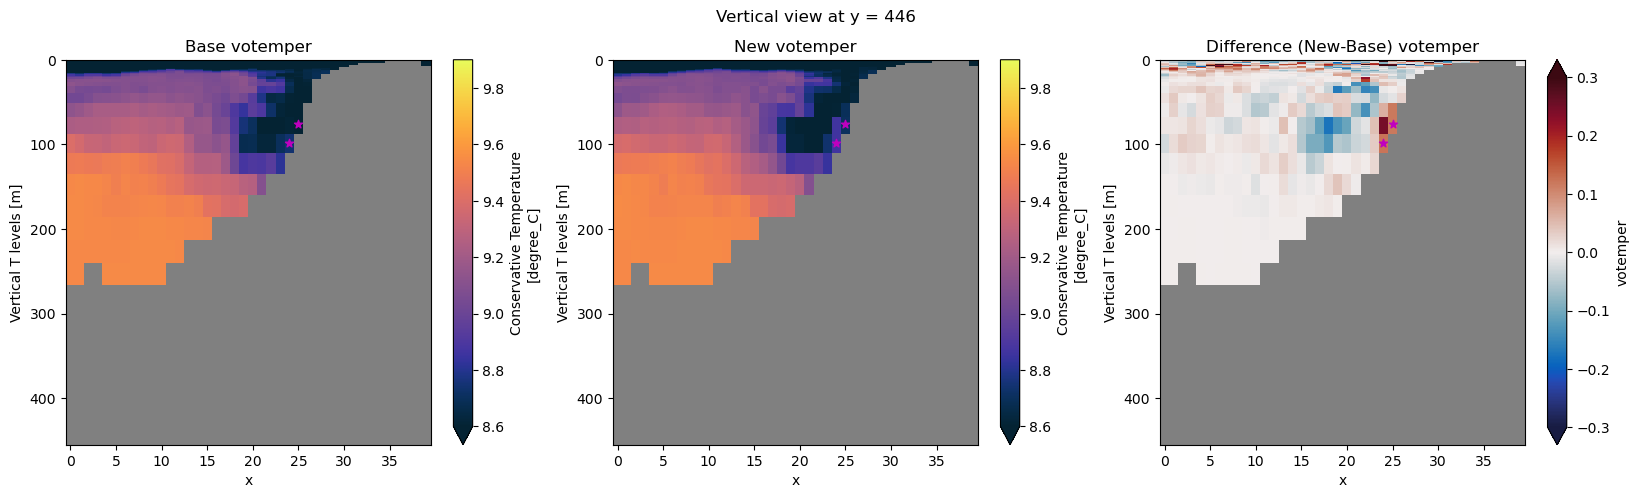

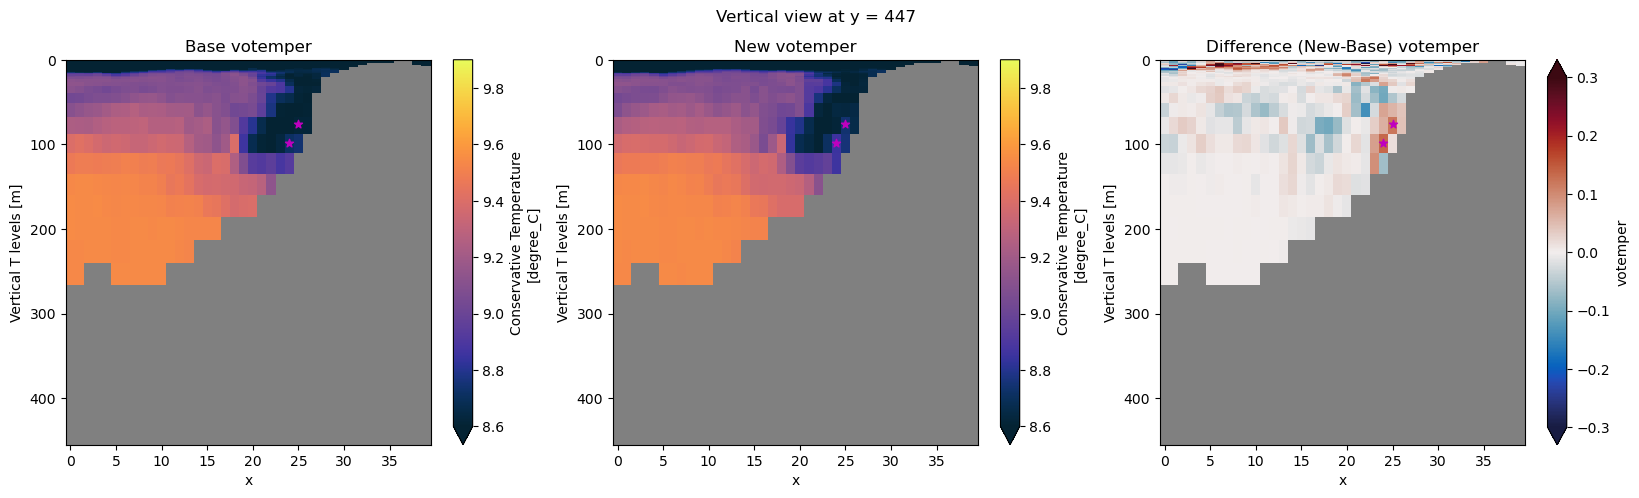

In [10]:
verticalview(combined_data_votemper, data5, 'votemper', 119, 446, cm_temp, 9.9, 8.6, 0.3)
verticalview(combined_data_votemper, data5, 'votemper', 119, 447, cm_temp, 9.9, 8.6, 0.3)

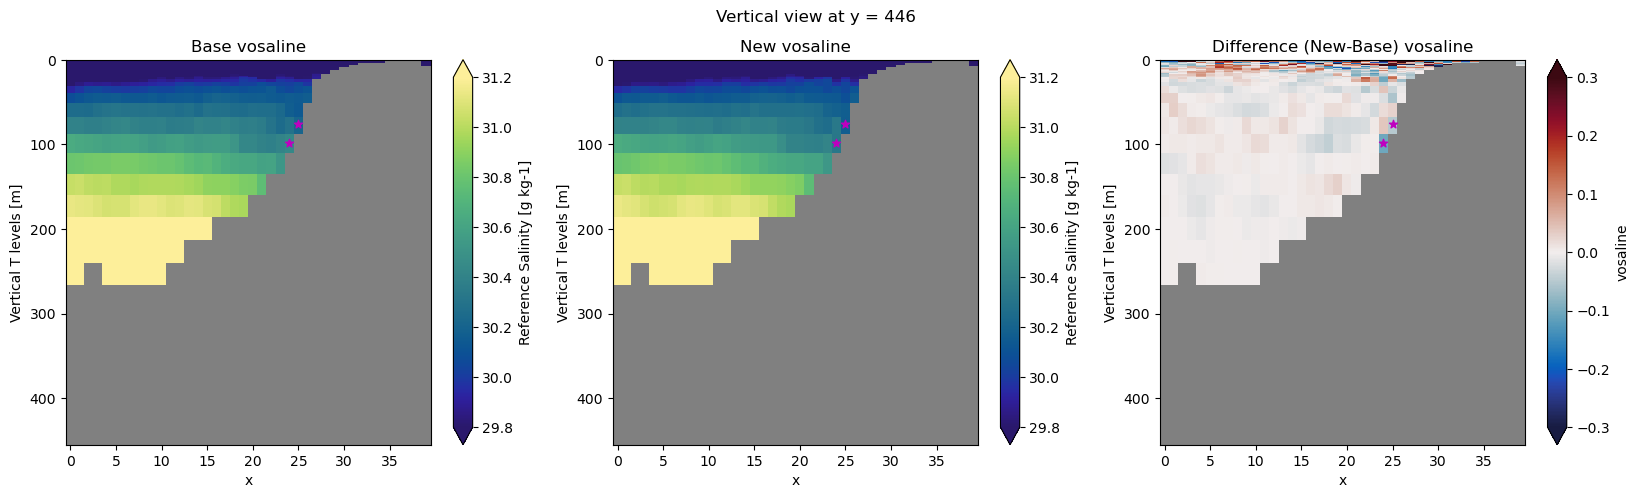

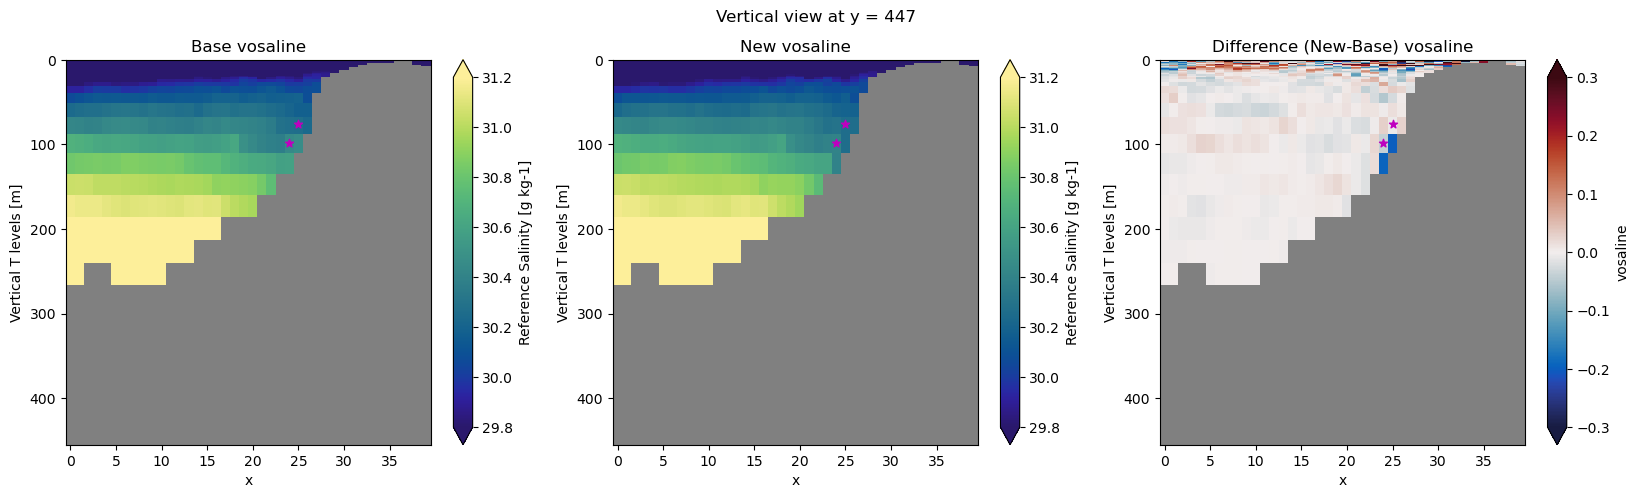

In [11]:
verticalview(combined_data_vosaline, data5, 'vosaline', 119, 446, cm_salt, 31.2, 29.8, 0.3)
verticalview(combined_data_vosaline, data5, 'vosaline', 119, 447, cm_salt, 31.2, 29.8, 0.3)

In [12]:
def vertical_view_x(base, new, field, it, dep,  cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, :, 400+iz:500-iz, dep].where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[0].set_title(f'Base {field}')

    new[field][it, :, 400+iz:500-iz, dep].where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, :, 400+iz:500-iz, dep]-
     base[field][it, :, 400+iz:500-iz, dep]).where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[2], cmap=cm_bwr, 
                                        vmax=dvmax, vmin=-dvmax, yincrease = False)
    axs[2].set_title(f'Difference (New-Base) {field}')

    fig.suptitle(f'Vertical view at x = {dep}')

    axs[0].scatter(447 - 430, 98, marker = '*', color = 'm')
    axs[0].scatter(446 - 430, 76, marker = '*', color = 'm')

    axs[1].scatter(447 - 430, 98, marker = '*', color = 'm')
    axs[1].scatter(446 - 430, 76, marker = '*', color = 'm')

    axs[2].scatter(447 - 430, 98, marker = '*', color = 'm')
    axs[2].scatter(446 - 430, 76, marker = '*', color = 'm')

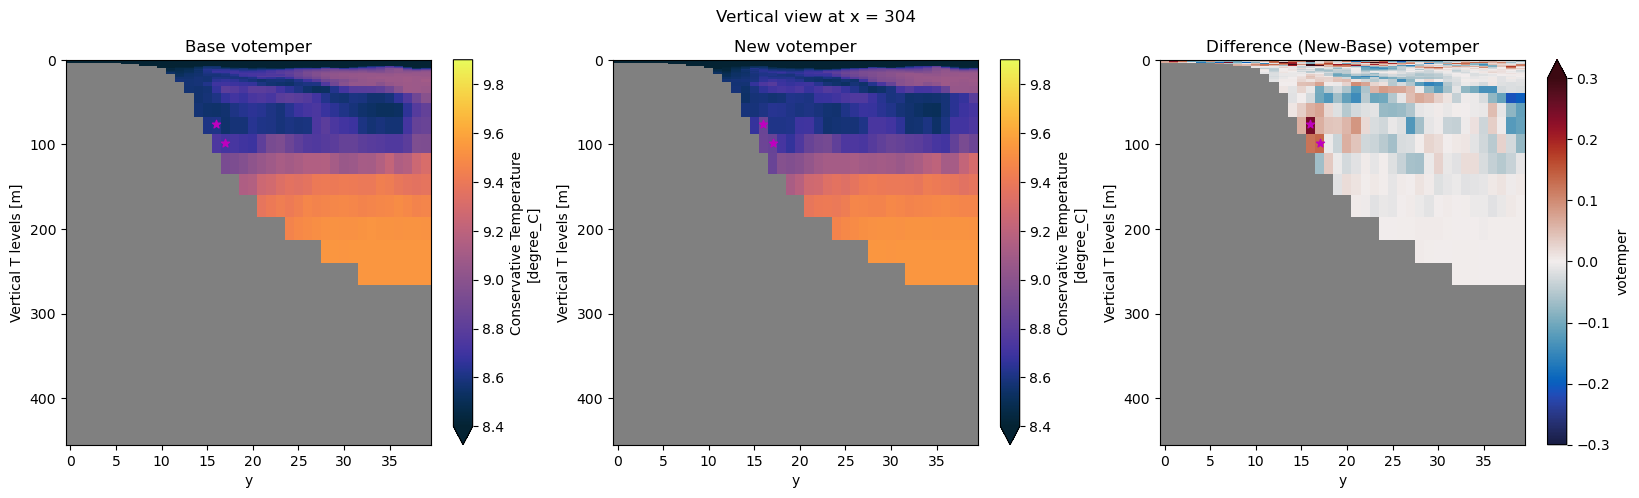

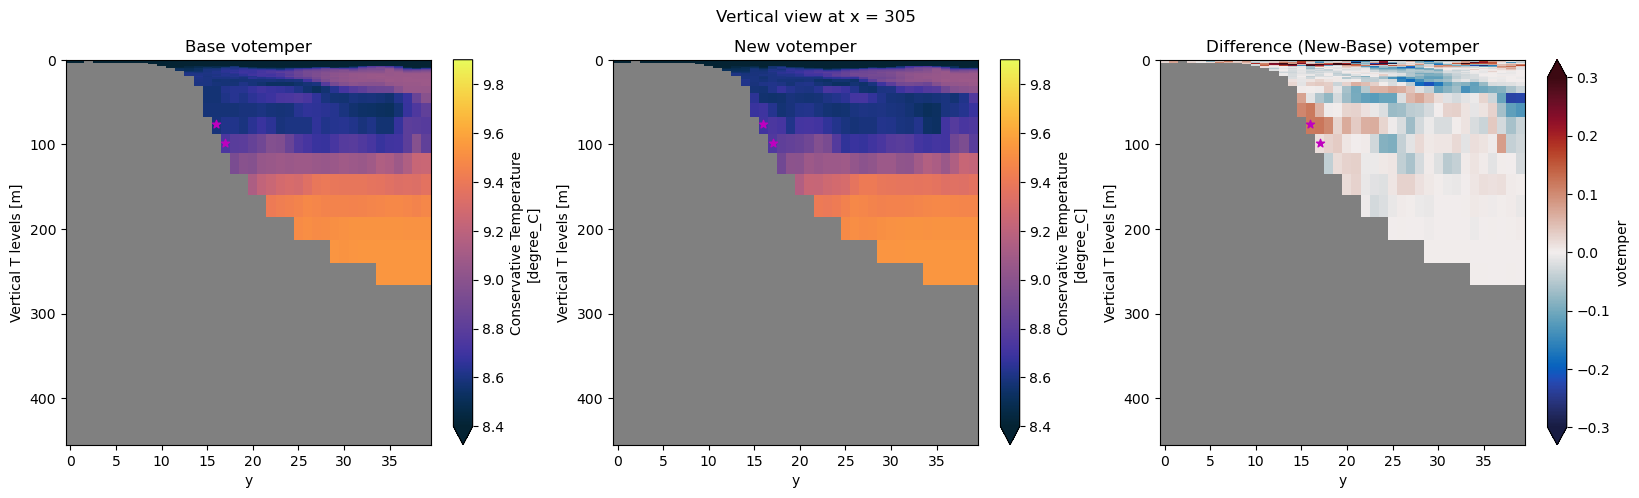

In [13]:
vertical_view_x(combined_data_votemper, data5, 'votemper', 119, 304, cm_temp, 9.9, 8.4, 0.3)
vertical_view_x(combined_data_votemper, data5, 'votemper', 119, 305, cm_temp, 9.9, 8.4, 0.3)

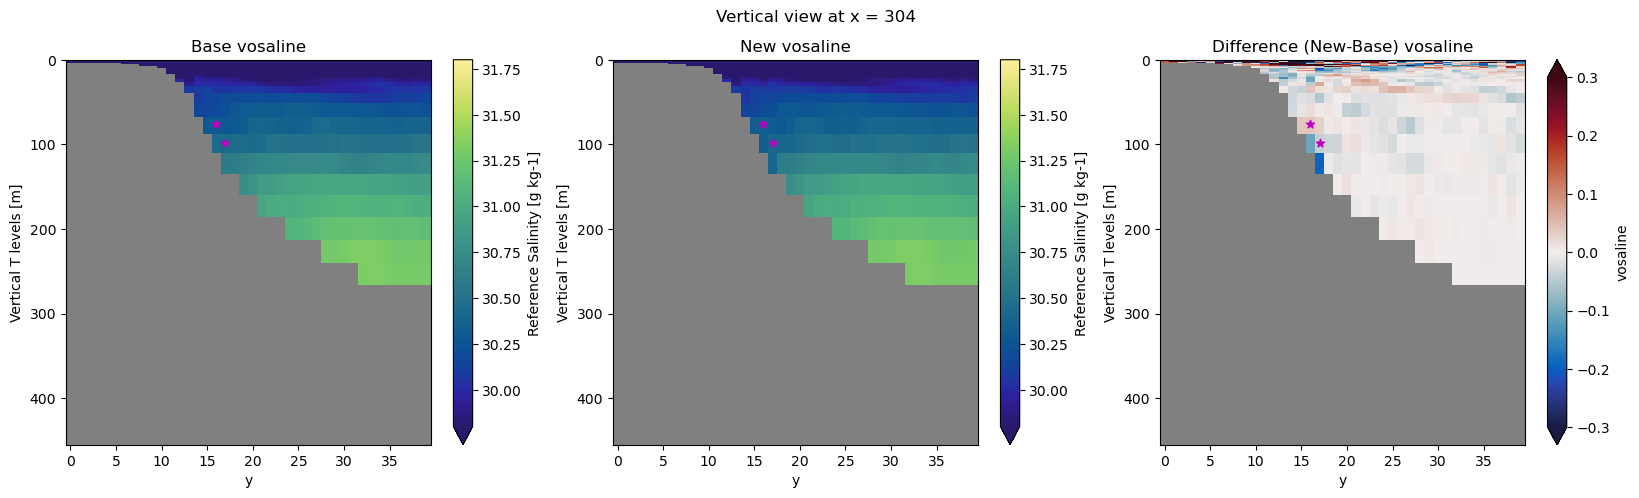

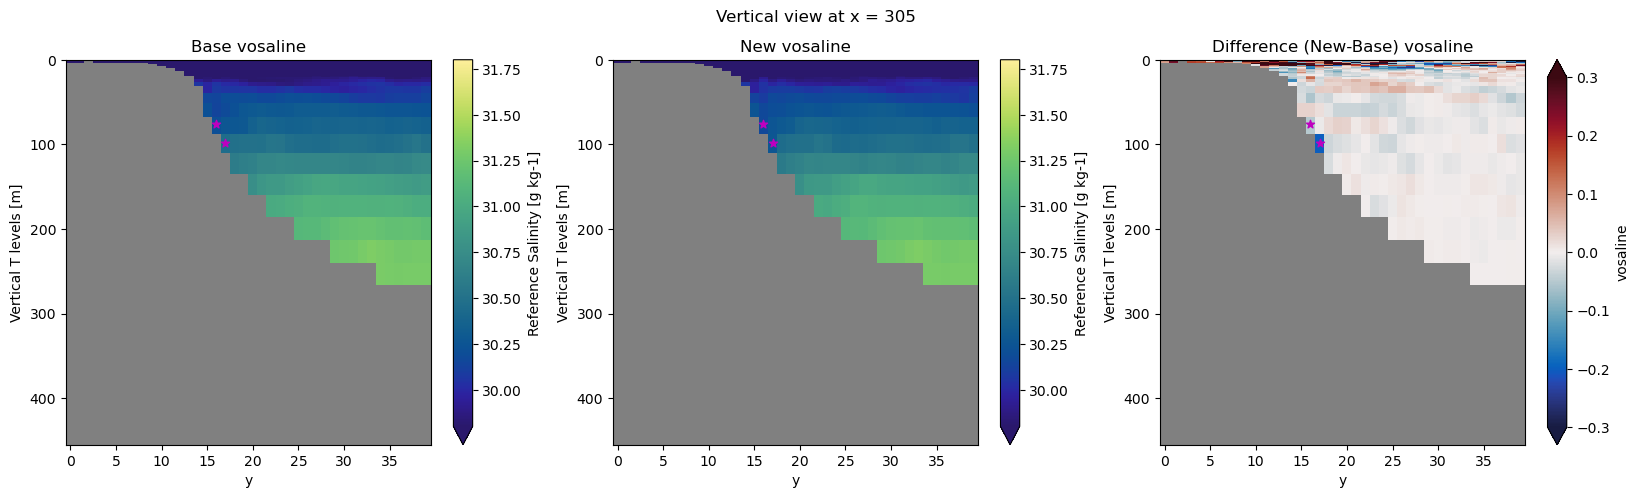

In [14]:
vertical_view_x(combined_data_vosaline, data5, 'vosaline', 119, 304, cm_salt, 31.8, 29.8, 0.3)
vertical_view_x(combined_data_vosaline, data5, 'vosaline', 119, 305, cm_salt, 31.8, 29.8, 0.3)

In [5]:
def plotSumDiffTime(base, new, field, vmin, vmax, cmp):
    fig, axs = plt.subplots(1, 1, figsize=(20, 5))
    diff = new[field]- base[field]
    sum_diff = diff.sum(dim = ["y", "x"])
    sum_diff.plot(ax=axs, y = "deptht", yincrease = False, vmin = vmin, vmax = vmax, cmap = cmp)
    axs.set_title(f'Time Series for Sum of difference for {field}')

In [6]:
iz = 30
y_slice=slice(400+iz, 500-iz)
x_slice=slice(250+iz, 350-iz)
data5_slice= data5.isel(y = y_slice, x = x_slice)
combined_data_votemper_slice = combined_data_votemper.isel(y = y_slice, x = x_slice)
combined_data_vosaline_slice = combined_data_vosaline.isel(y = y_slice, x = x_slice)


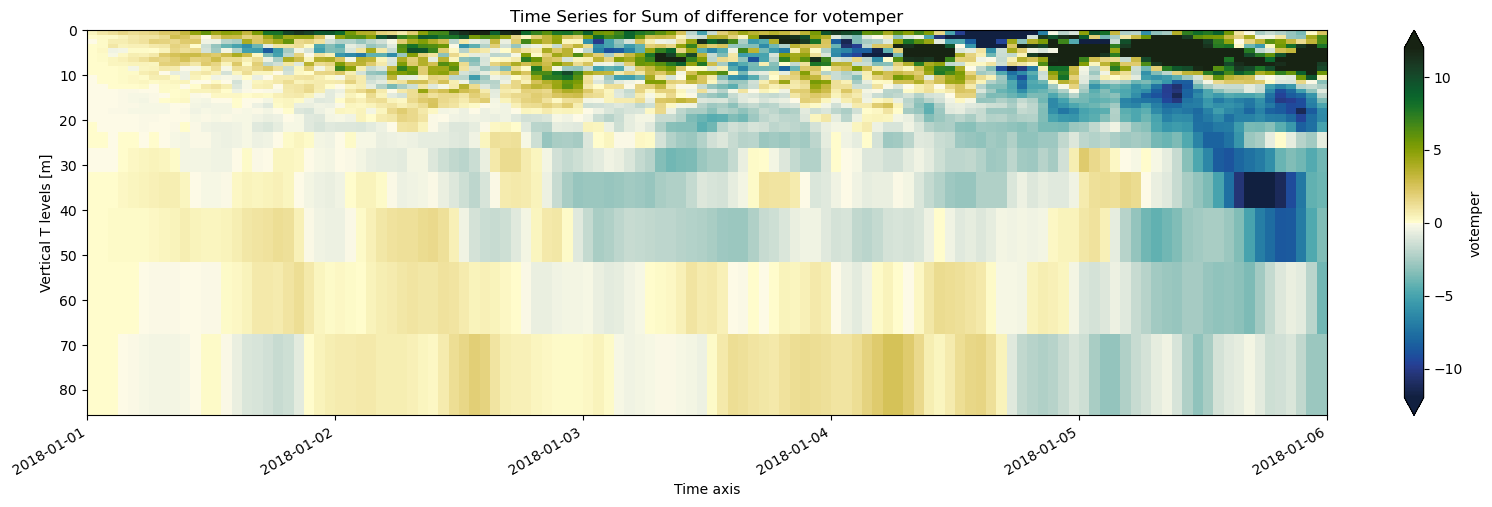

In [16]:
plotSumDiffTime(combined_data_votemper_slice, data5_slice, 'votemper', -12, 12, cm_delta)

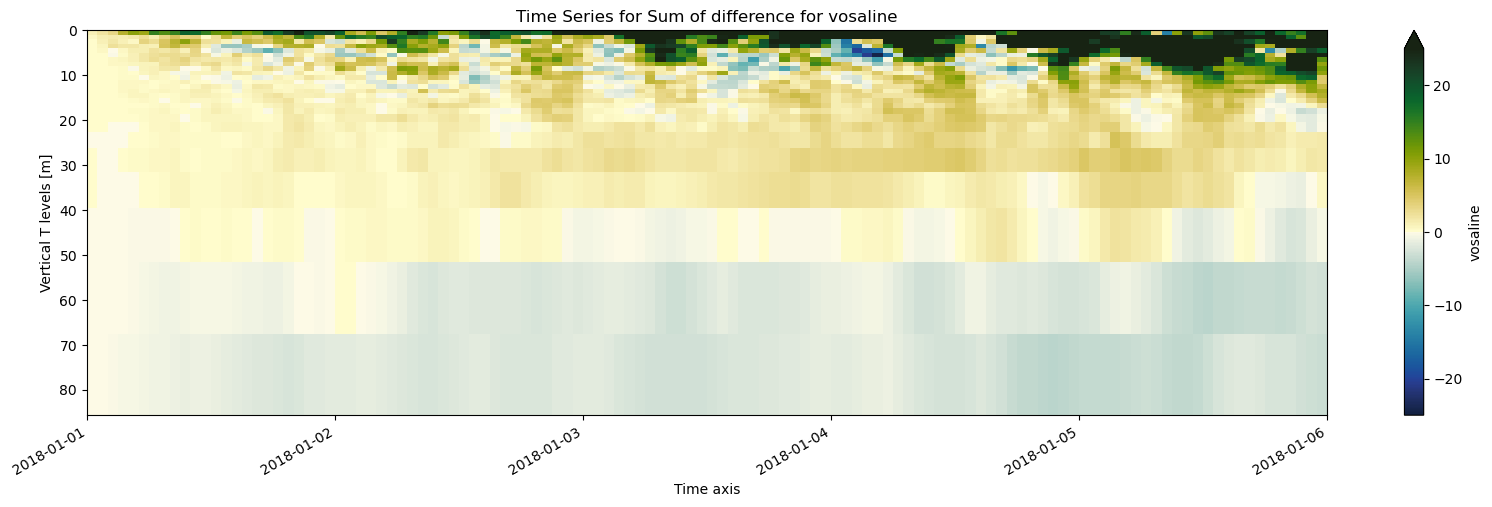

In [17]:
plotSumDiffTime(combined_data_vosaline_slice, data5_slice, 'vosaline', -25, 25, cm_delta)

In [7]:
def plotAvgDiffTime(base, new, field, vmin, vmax, cmp):
    fig, axs = plt.subplots(1, 1, figsize=(20, 5))
    diff = new[field]- base[field]
    diff_avg = (diff * area.isel(y = y_slice, x = x_slice)).where(tmask.isel(y = y_slice, x = x_slice)).mean(axis = 2).mean(axis = 2) / area.isel(y = y_slice, x = x_slice).where(tmask.isel(y = y_slice, x = x_slice)).mean()
    diff_avg.plot(ax=axs, y = "deptht", yincrease = False, vmin = vmin, vmax = vmax, cmap = cmp)
    axs.set_title(f'Time Series for average difference in {field}')

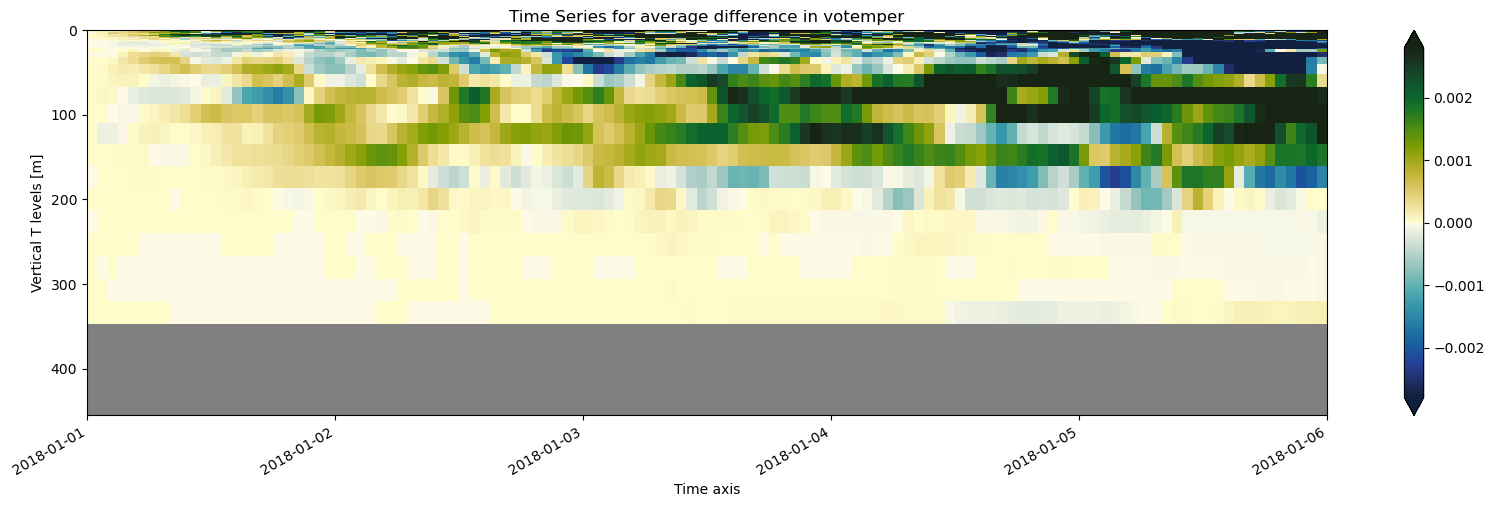

In [8]:
plotAvgDiffTime(combined_data_votemper_slice, data5_slice, 'votemper', -0.0028, 0.0028, cm_delta)

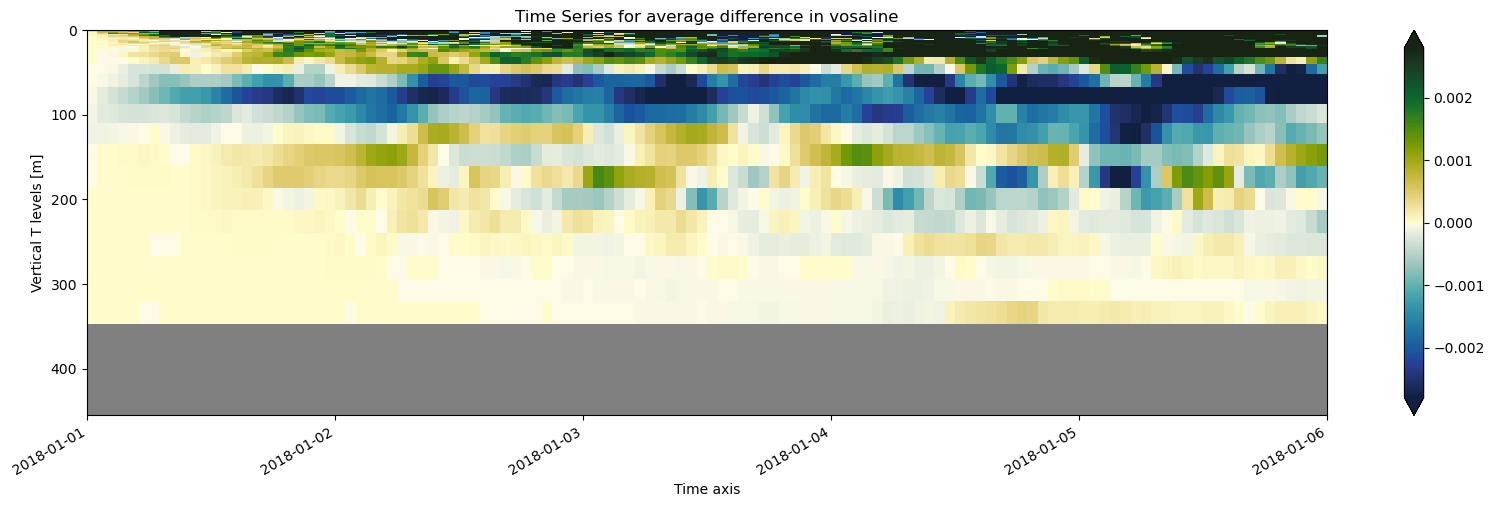

In [9]:
plotAvgDiffTime(combined_data_vosaline_slice, data5_slice, 'vosaline', -0.0028, 0.0028, cm_delta)

In [12]:
data5.votemper.deptht.values

array([  0.5000003,   1.5000031,   2.5000114,   3.5000305,   4.5000706,
         5.5001507,   6.5003104,   7.500623 ,   8.501236 ,   9.502433 ,
        10.5047655,  11.509312 ,  12.518167 ,  13.535412 ,  14.568982 ,
        15.634288 ,  16.761173 ,  18.007135 ,  19.481785 ,  21.389978 ,
        24.100256 ,  28.229916 ,  34.685757 ,  44.517723 ,  58.484333 ,
        76.58559  ,  98.06296  , 121.866516 , 147.08946  , 173.11449  ,
       199.57304  , 226.2603   , 253.06664  , 279.93454  , 306.8342   ,
       333.75018  , 360.67453  , 387.6032   , 414.5341   , 441.4661   ],
      dtype=float32)

In [20]:
data5_p1 = data5.sel(deptht = 121.866516, y = 447, x = 304)
combined_data_votemper_p1 = combined_data_votemper.sel(deptht = 121.866516, y = 447, x = 304)
combined_data_vosaline_p1 = combined_data_vosaline.sel(deptht = 121.866516, y = 447, x = 304)

data5_p2 = data5.sel(deptht = 98.06296, y = 446, x = 304)
combined_data_votemper_p2 = combined_data_votemper.sel(deptht = 98.06296, y = 446, x = 304)
combined_data_vosaline_p2 = combined_data_vosaline.sel(deptht = 98.06296, y = 446, x = 304)

data5_p3= data5.sel(deptht = 98.06296, y = 447, x = 305)
combined_data_votemper_p3 = combined_data_votemper.sel(deptht = 98.06296, y = 447, x = 305)
combined_data_vosaline_p3 = combined_data_vosaline.sel(deptht = 98.06296, y = 447, x = 305)

data5_p4= data5.sel(deptht = 76.58559, y = 446, x = 305)
combined_data_votemper_p4 = combined_data_votemper.sel(deptht = 76.58559, y = 446, x = 305)
combined_data_vosaline_p4 = combined_data_vosaline.sel(deptht = 76.58559, y = 446, x = 305)


Text(0, 0.5, 'Temperature')

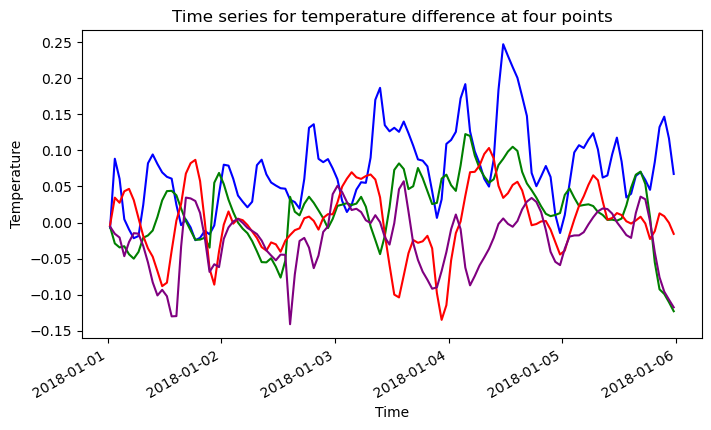

In [22]:
fig, axs = plt.subplots(1, 1, figsize=(8, 4))
diff1 = combined_data_votemper_p1.votemper - data5_p1.votemper
diff1.plot.line(x = "time_counter", ax = axs, color = 'blue')

diff2 = combined_data_votemper_p2.votemper - data5_p2.votemper
diff2.plot.line(x = "time_counter", ax = axs, color = 'green')

diff3 = combined_data_votemper_p3.votemper - data5_p3.votemper
diff3.plot.line(x = "time_counter", ax = axs, color = 'red')

diff4 = combined_data_votemper_p4.votemper - data5_p4.votemper
diff4.plot.line(x = "time_counter", ax = axs, color = 'purple')

axs.set_title('Time series for temperature difference at four points')
axs.set_xlabel('Time')
axs.set_ylabel('Temperature')




Text(0, 0.5, 'Salinity')

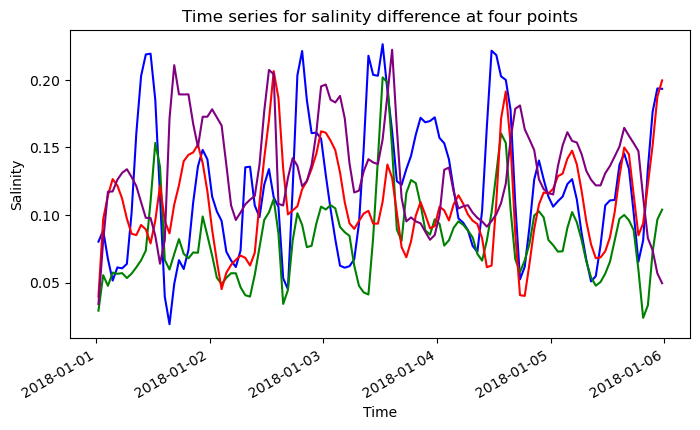

In [23]:
fig, axs = plt.subplots(1, 1, figsize=(8, 4))
diff1 = combined_data_vosaline_p1.vosaline - data5_p1.vosaline
diff1.plot.line(x = "time_counter", ax = axs, color = 'blue')

diff2 = combined_data_vosaline_p2.vosaline - data5_p2.vosaline
diff2.plot.line(x = "time_counter", ax = axs, color = 'green')

diff3 = combined_data_vosaline_p3.vosaline - data5_p3.vosaline
diff3.plot.line(x = "time_counter", ax = axs, color = 'red')

diff4 = combined_data_vosaline_p4.vosaline - data5_p4.vosaline
diff4.plot.line(x = "time_counter", ax = axs, color = 'purple')

axs.set_title('Time series for salinity difference at four points')
axs.set_xlabel('Time')
axs.set_ylabel('Salinity')

In [7]:
def plotSumDiffTimeLine(base, new, field, vmin, vmax, cmp):
    fig, axs = plt.subplots(1, 1, figsize=(20, 5))
    diff = new[field]- base[field]
    sum_diff = diff.sum(dim = ["y", "x"])
    max_depth = sum_diff.argmax(dim = 'deptht')
    min_depth = sum_diff.argmin(dim='deptht') 
    sum_diff.plot(ax=axs, y = "deptht", yincrease = False, vmin = vmin, vmax = vmax, cmap = cmp)
    axs.set_title(f'Time Series for Sum of difference for {field}')
    axs.plot(sum_diff['time_counter'], sum_diff['deptht'][max_depth], 'r-')
    axs.plot(sum_diff['time_counter'], sum_diff['deptht'][min_depth], 'b-')
    axs.set_ylim(150, 0)

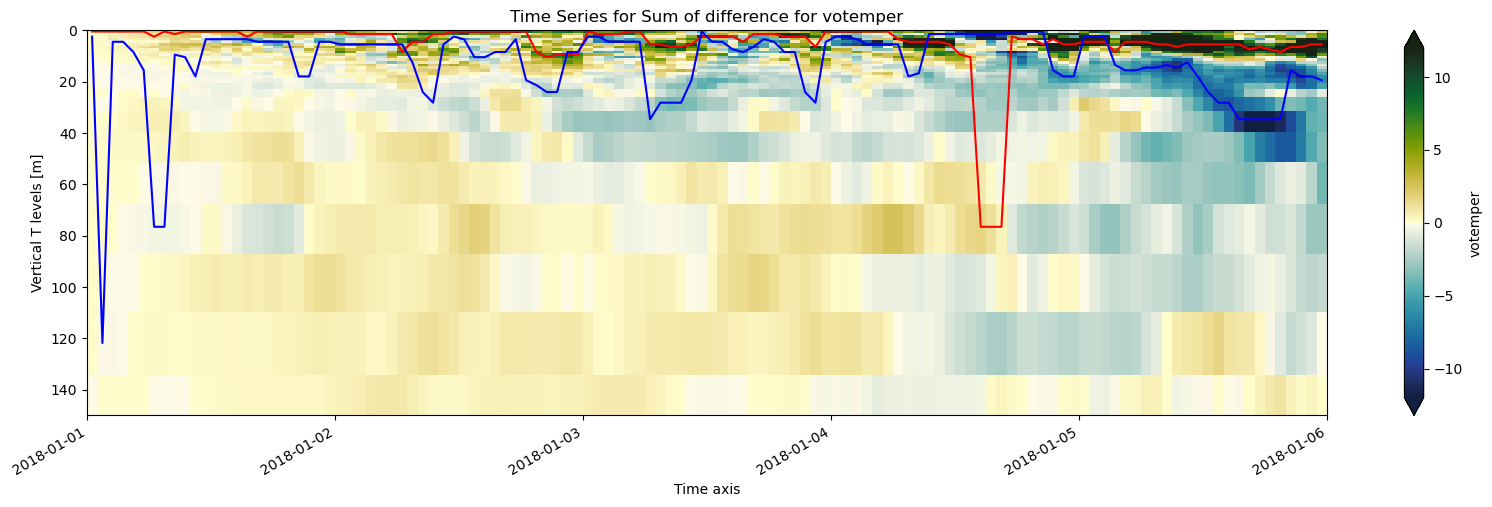

In [8]:
plotSumDiffTimeLine(combined_data_votemper_slice, data5_slice, 'votemper', -12, 12, cm_delta)

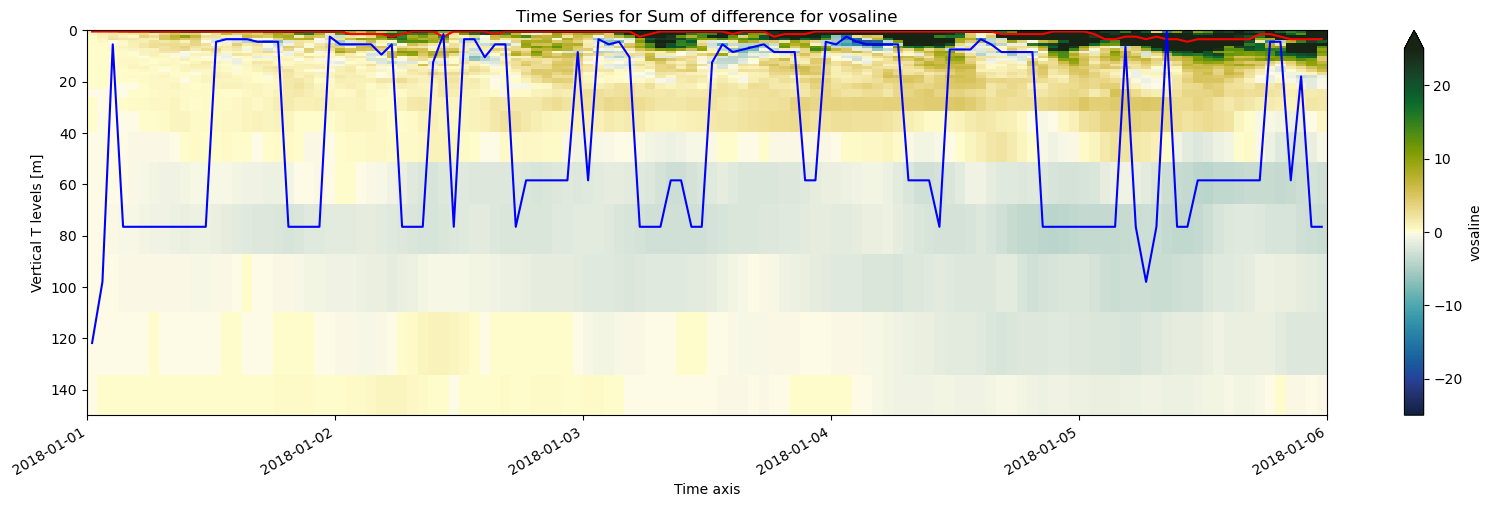

In [9]:
plotSumDiffTimeLine(combined_data_vosaline_slice, data5_slice, 'vosaline', -25, 25, cm_delta)